# Build temperature pathways consistent with AR6 assessment

In [57]:
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt
import xarray as xr

### Read global mean surface temperature to compute the difference between the AR5 reference period of 1995-2014 and the AR5 reference period of 1986-2005.

In [9]:
data_dir = '../../../../Data/SurfaceAirTemperature/'

In [10]:
df = pd.read_csv(f'{data_dir}GLB.Ts+dSST.csv', header=1)
df = df.iloc[1:-1]
df.set_index('Year', inplace=True)
df = df.astype(float)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1881,-0.18,-0.13,0.04,0.06,0.07,-0.17,0.01,-0.02,-0.14,-0.20,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17
1882,0.18,0.15,0.05,-0.15,-0.13,-0.22,-0.15,-0.06,-0.13,-0.23,-0.15,-0.35,-0.10,-0.07,0.09,-0.08,-0.14,-0.17
1883,-0.28,-0.35,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-0.22,-0.10,-0.16,-0.18,-0.33,-0.15,-0.08,-0.17
1884,-0.12,-0.06,-0.35,-0.39,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-0.32,-0.30,-0.27,-0.26,-0.09,-0.36,-0.31,-0.27
1885,-0.58,-0.33,-0.26,-0.41,-0.44,-0.43,-0.33,-0.30,-0.28,-0.23,-0.23,-0.09,-0.33,-0.34,-0.40,-0.37,-0.35,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1.17,1.37,1.35,1.12,0.96,0.81,0.85,1.02,0.91,0.89,0.91,0.86,1.02,1.04,1.24,1.14,0.89,0.90
2017,1.03,1.15,1.17,0.95,0.92,0.73,0.82,0.87,0.77,0.90,0.88,0.94,0.93,0.92,1.01,1.01,0.80,0.85
2018,0.82,0.85,0.90,0.89,0.83,0.78,0.83,0.76,0.81,1.02,0.83,0.92,0.85,0.86,0.87,0.87,0.79,0.89


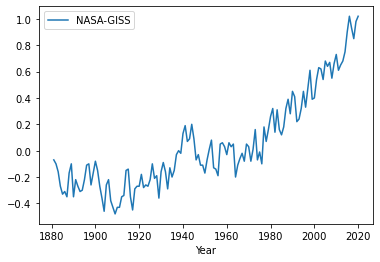

In [11]:
df['J-D'].plot(legend=True,label='NASA-GISS');

In [12]:
ar5_ref = df['J-D'].loc[1986:2005].mean()
ar6_ref = df['J-D'].loc[1995:2014].mean()

print('Mean over the period AR5 reference period 1986-2005:')
print(ar5_ref)
print('Mean over the period AR6 reference period 1995-2014:')
print(ar6_ref)
print('Difference:')
print(ar6_ref-ar5_ref)

Mean over the period AR5 reference period 1986-2005:
0.42350000000000004
Mean over the period AR6 reference period 1995-2014:
0.5799999999999998
Difference:
0.1564999999999998


### Define functions for AR6 pathways

In [52]:
def get_ar6_temp():
    '''Make a dataframe from the temperature values of table 4.1 (or 4.6?) 
    of AR6. Normaly relative to 1995–2014 but modify to make it relative to
    the AR5 reference period 1986-2005.
    Data in the table refer to the following periods: 
    2021–2040, 2041–2060, 2081–2100 that we attribute to their middle years.'''
    
    central_years = [2005, 2030, 2050, 2090]
    ssp126 = pd.DataFrame({'mean':[0, 0.6, 0.9, 0.9], '5pc':[0, 0.4, 0.5, 0.5], '95pc':[0, 0.9, 1.3, 1.5]},
                       index=central_years)
    ssp126.columns = pd.MultiIndex.from_product([['ssp126'], ssp126.columns])
    ssp245 = pd.DataFrame({'mean':[0, 0.7, 1.1, 1.8], '5pc':[0, 0.4, 0.8, 1.2], '95pc':[0, 0.9, 1.6, 2.6]},
                       index=central_years)
    ssp245.columns = pd.MultiIndex.from_product([['ssp245'], ssp245.columns])
    ssp585 = pd.DataFrame({'mean':[0, 0.8, 1.5, 3.5], '5pc':[0, 0.5, 1.1, 2.4], '95pc':[0, 1.0, 2.1, 4.8]},
                       index=central_years)
    ssp585.columns = pd.MultiIndex.from_product([['ssp585'], ssp585.columns])

    all_df = pd.concat([ssp126, ssp245, ssp585], axis = 1)
    # Add temperature difference between 1995–2014 and 1986-2005
    all_df = all_df + 0.156
    all_df.loc[1995] = 0
    all_df = all_df.sort_index()
    
    return all_df

In [14]:
ar6_temp_df = get_ar6_temp()

ar6_temp_df

ssp126               ssp245               ssp585              
       mean    5pc   95pc   mean    5pc   95pc   mean    5pc   95pc
1995  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
2005  0.156  0.156  0.156  0.156  0.156  0.156  0.156  0.156  0.156
2030  0.756  0.556  1.056  0.856  0.556  1.056  0.956  0.656  1.156
2050  1.056  0.656  1.456  1.256  0.956  1.756  1.656  1.256  2.256
2090  1.056  0.656  1.656  1.956  1.356  2.756  3.656  2.556  4.956

### Compare observed temperature and projections

<AxesSubplot:xlabel='Year'>

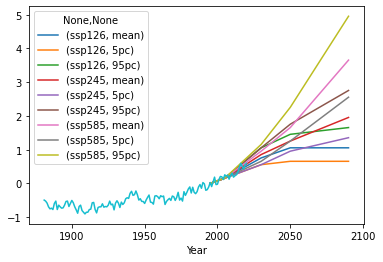

In [15]:
ar6_temp_df.plot()
(df['J-D']-ar5_ref).plot()

### Test polynomial fit

In [89]:
new_df = ar6_temp_df['ssp585'].copy()
# Assuming a normal distribution (it is not!) the standard devation is:
new_df['sigma'] = (new_df['95pc'] - new_df['5pc'])/(2*1.64)
new_df

,mean,5pc,95pc,sigma
1995,0.000,0.000,0.000,0.000000
2005,0.156,0.156,0.156,0.000000
2030,0.956,0.656,1.156,0.152439
2050,1.656,1.256,2.256,0.304878
2090,3.656,2.556,4.956,0.731707


In [90]:
p = P.fit(new_df.index, new_df['mean'], 3)
years = np.arange(1980,2101) # Keep open?

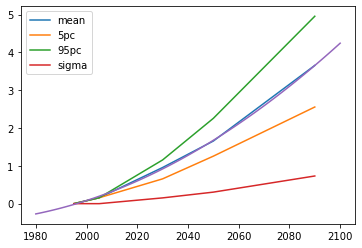

In [91]:
new_df.plot()
plt.plot(years, p(years))

### Define a few possible pathways using polynomial fit

In [79]:
def tglob_ar6(sce, start_date, ye):
    '''Provides a few time series of temperature consistent with the AR6 
    temperature assessment.
    Assumes normal distribution which is not the case in AR6. Needs to be 
    revised later.
    Export a data array.'''
    
    N = 20 # Number of time series to generate
    ar6_temp_df = get_ar6_temp()
    df = ar6_temp_df[sce].copy()
    # Assuming a normal distribution (it is not!) the standard devation is:
    df['sigma'] = (df['95pc'] - df['5pc'])/(2*1.64)
    
    NormD = np.random.normal(0, 1, N)
    years = np.arange(start_date,ye+1)
    paths = np.zeros([N,len(years)])
    
    for i in range(N):
        p = P.fit(df.index, df['mean']+NormD[i]*df['sigma'], 3)
        paths[i,:] = p(years)
    
    ds = xr.DataArray(paths, coords=[np.arange(N), years] , dims=['model', 'time'])
    
    return ds

In [80]:
ds = tglob_ar6('ssp585', 1980, 2101)
ds

<xarray.DataArray (model: 20, time: 122)>
array([[-0.261332  , -0.25017411, -0.23836394, ...,  4.90477593,
         4.9745463 ,  5.04464676],
       [-0.2688678 , -0.25573724, -0.2421332 , ...,  4.3593462 ,
         4.42218972,  4.48539433],
       [-0.2706219 , -0.25703216, -0.24301057, ...,  4.23238725,
         4.29361841,  4.35521788],
       ...,
       [-0.24872566, -0.24086777, -0.23205848, ...,  5.81720355,
         5.89856158,  5.98019784],
       [-0.26447105, -0.25249144, -0.23993403, ...,  4.67757636,
         4.74446134,  4.81168933],
       [-0.2810268 , -0.26471333, -0.2482149 , ...,  3.47929656,
         3.53096361,  3.58304178]])
Coordinates:
  * model    (model) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2097 2098 2099 2100 2101

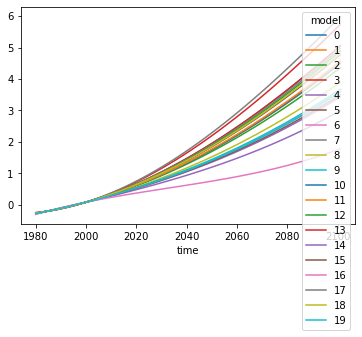

In [81]:
ds.plot.line(x='time')